In [90]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

<div style="text-align: center;">
    <h1>Lab 03 - Tables and Visualization</h1>
    <em>View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.</em>
</div>

## References

* [Sections 6.0 - 6.4 of the Textbook](https://inferentialthinking.com/chapters/06/Tables.html)
* [Sections 7.0 - 7.3 of the Textbook](https://inferentialthinking.com/chapters/07/Visualization.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

First, run the following cell to set up the lab, and make sure you run the cell at the top of the notebook that initializes Otter.

In [91]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Some Table Operations

The CSV file `farmers_markets.csv` contains data on farmers' markets in the United States.  (The was data collected from [the USDA's website](https://apps.ams.usda.gov/FarmersMarketsExport/ExcelExport.aspx)).  Each row represents one such market.

Run the next cell to load the `farmers_markets` table.

In [4]:
farmers_markets = Table.read_table('farmers_markets.csv')

Let's examine our table to see what data it contains.

### `show`

#### Task 01 📍🔎

Use the method `show` to display the first 5 rows of `farmers_markets`. `tbl.show(3)` will show the first 3 rows of `tbl`.

Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task.

**Important Note:** Be careful to not to call `.show()` without an argument. There is a lot of information in the farmers market table and showing it all will crash your kernel!

<!-- BEGIN QUESTION -->



In [6]:
farmers_markets.show(5)

FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,Season3Time,Season4Date,Season4Time,x,y,Location,Credit,WIC,WICcash,SFMNP,SNAP,Organic,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
1018261,Caledonia Farmers Market Association - Danville,https://www.caledoniafarmersmarket.com,https://www.facebook.com/Danville.VT.Farmers.Market/,nan,nan,nan,nan,Danville,Caledonia,Vermont,05828,06/10/2020 to 10/07/2020,Wed: 9:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-72.1403,44.411,nan,Y,Y,N,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,N,Y,Y,Y,Y,N,Y,Y,Y,N,N,Y,Y,N,N,8/3/2020 3:23:12 PM
1009994,18th Street Farmer's Market,nan,https://www.facebook.com/ScottsbluffFarmersMarket,nan,nan,nan,18th and Broadway,Scottsbluff,Scotts Bluff,Nebraska,69361,06/05/2021 to 06/05/2021,Sat: 8:00 AM-11:00 AM;,nan,nan,nan,nan,nan,nan,-103.663,41.8643,nan,Y,N,N,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,Y,Y,N,N,N,Y,Y,Y,N,N,N,N,N,N,2/18/2021 2:37:26 PM
1000709,26th Annual Highlands Business Partnership's Farmers Market,http://www.highlandsnj.com,https://www.facebook.com/pages/Highlands-Business-Partne ...,nan,nan,visithighlandsnj - Instagram,71 Waterwitch Avenue,Highlands,Monmouth,New Jersey,07732,06/06/2020,Sat: 8:30 AM-2:00 PM;,nan,nan,nan,nan,nan,nan,-73.9944,40.4048,nan,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,N,N,N,Y,Y,N,N,Y,N,N,N,N,Y,N,Y,N,N,N,Y,9/10/2020 3:25:18 PM
1019956,29 Palms Farmers' Market,nan,https://www.facebook.com/29palmsfarmersmarket/,nan,nan,IG @29palmsfarmersmarket,73484 Twentynine Palms Hwy,Twentynine Palms,San Bernardino,California,92277,01/01/2020 to 01/01/2020,Sat: 8:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-116.059,34.1358,nan,Y,N,N,N,N,Y,Y,N,Y,N,Y,N,Y,Y,Y,Y,N,N,N,Y,N,N,Y,Y,N,N,N,N,Y,N,Y,N,N,N,N,1/13/2021 5:15:12 PM
1009959,2nd Street Market - Five Rivers MetroPark,http://www.metroparks.org,https://www.facebook.com/2ndStreetMarket/,nan,nan,nan,600 E. 2nd Street,Dayton,Montgomery,Ohio,45402,01/01/2018 to 05/31/2018,Thu: 11:00 AM-3:00 PM;Fri: 11:00 AM-3:00 PM;Sat: 8:00 AM ...,06/01/2018 to 12/31/2018,Thu: 11:00 AM-3:00 PM;Fri: 11:00 AM-3:00 PM;Sat: 8:00 AM ...,nan,nan,nan,nan,-84.181,39.7626,nan,Y,N,Y,N,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,N,N,Y,Y,Y,Y,Y,Y,Y,N,Y,7/26/2018 4:26:56 PM


<!-- END QUESTION -->

Notice that some of the values in this table are missing, as denoted by `nan`. This means either that the value is not available (e.g. if we don’t know the market’s street address) or not applicable (e.g. if the market doesn’t have a street address). You'll also notice that the table has a large number of columns in it!

### `num_columns`

The table property `num_columns` returns the number of columns in a table. (A "property" is a variable in an object. It is referenced without parentheses.)

Example call: `<tbl>.num_columns`

#### Task 02 📍

Use `num_columns` to find the number of columns in our farmers' markets dataset.

Assign the number of columns to `num_farmers_markets_columns`.

In [7]:
num_farmers_markets_columns = farmers_markets.num_columns
print("The table has", num_farmers_markets_columns, "columns in it!")

The table has 59 columns in it!


In [8]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ Great work!

### `num_rows`

Similarly, the property `num_rows` tells you how many rows are in a table. Run the following cell to see how that table property can be accessed.

In [9]:
num_farmers_markets_rows = farmers_markets.num_rows
print("The table has", num_farmers_markets_rows, "rows in it!")

The table has 1681 rows in it!


### `select` and `drop`

Most of the columns are about particular products -- whether the market sells tofu, pet food, etc.  If we're not interested in that information, it just makes the table difficult to read.  This comes up more than you might think, because people who collect and publish data may not know ahead of time what people will want to do with it.

In such situations, we can use the table method `select` to choose only the columns that we want in a particular table. It takes any number of arguments. Each should be the name of a column in the table. It returns a new table with only those columns in it. The columns are in the order *in which they were listed as arguments*.

For example, the value of `farmers_markets.select("MarketName", "State")` is a table with only the name and the state of each farmers' market in `farmers_markets`.

#### Task 03 📍

Use `select` to create a table with only the name, city, county, state, longitude (`x`), and latitude (`y`) of each market.  Assign that new table to the name `farmers_markets_locations`. 

**Note:** We didn't create the column names (and their format), they come directly from the United States Department of Agriculture data resource. Make sure to be exact when using column names with `select`. Double-check capitalization! In this task, the order of the columns doesn't matter, but it might in future tasks!

In [18]:
farmers_markets_locations = farmers_markets.select("MarketName", "city", "County", "State", "x", "y")
farmers_markets_locations

MarketName,city,County,State,x,y
Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,-72.1403,44.411
18th Street Farmer's Market,Scottsbluff,Scotts Bluff,Nebraska,-103.663,41.8643
26th Annual Highlands Business Partnership's Farmers Market,Highlands,Monmouth,New Jersey,-73.9944,40.4048
29 Palms Farmers' Market,Twentynine Palms,San Bernardino,California,-116.059,34.1358
2nd Street Market - Five Rivers MetroPark,Dayton,Montgomery,Ohio,-84.181,39.7626
3 French Hens French Country Market,Morris,Grundy,Illinois,-88.4252,41.3564
3rd Day Farmer's Market,Lake City,Missaukee,Michigan,-85.2961,44.293
4 Veggies & 3 Fruits Farmer’s Market,Chicago,Cook,Illinois,-87.6296,41.7819
61st Street Farmers Market,Chicago,Cook,Illinois,-87.5906,41.7841
A Growers' Market,Tallahassee,Leon,Florida,-84.2799,30.462


In [19]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Great work. It seems you have the correct columns!
task_03 - 2 message: ✅ Your table seems to have the correct information.

### `drop`

`drop` serves the same purpose as `select`, but it takes away the columns that you provide rather than the ones that you don't provide. Like `select`, `drop` returns a new table.

For example, the following code would create a copy of the `farmers_markets` table without the `FMID` and `updateTime` columns.

In [20]:
farmers_markets.drop("FMID", "updateTime")

MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,Season3Time,Season4Date,Season4Time,x,y,Location,Credit,WIC,WICcash,SFMNP,SNAP,Organic,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,Maple,Meat,Nursery,Nuts,Plants,Poultry,Prepared,Soap,Trees,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
Caledonia Farmers Market Association - Danville,https://www.caledoniafarmersmarket.com,https://www.facebook.com/Danville.VT.Farmers.Market/,nan,nan,nan,nan,Danville,Caledonia,Vermont,05828,06/10/2020 to 10/07/2020,Wed: 9:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-72.1403,44.411,nan,Y,Y,N,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,N,Y,Y,Y,Y,N,Y,Y,Y,N,N,Y,Y,N,N
18th Street Farmer's Market,nan,https://www.facebook.com/ScottsbluffFarmersMarket,nan,nan,nan,18th and Broadway,Scottsbluff,Scotts Bluff,Nebraska,69361,06/05/2021 to 06/05/2021,Sat: 8:00 AM-11:00 AM;,nan,nan,nan,nan,nan,nan,-103.663,41.8643,nan,Y,N,N,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,Y,Y,N,N,N,Y,Y,Y,N,N,N,N,N,N
26th Annual Highlands Business Partnership's Farmers Market,http://www.highlandsnj.com,https://www.facebook.com/pages/Highlands-Business-Partne ...,nan,nan,visithighlandsnj - Instagram,71 Waterwitch Avenue,Highlands,Monmouth,New Jersey,07732,06/06/2020,Sat: 8:30 AM-2:00 PM;,nan,nan,nan,nan,nan,nan,-73.9944,40.4048,nan,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,N,N,N,Y,Y,N,N,Y,N,N,N,N,Y,N,Y,N,N,N,Y
29 Palms Farmers' Market,nan,https://www.facebook.com/29palmsfarmersmarket/,nan,nan,IG @29palmsfarmersmarket,73484 Twentynine Palms Hwy,Twentynine Palms,San Bernardino,California,92277,01/01/2020 to 01/01/2020,Sat: 8:00 AM-1:00 PM;,nan,nan,nan,nan,nan,nan,-116.059,34.1358,nan,Y,N,N,N,N,Y,Y,N,Y,N,Y,N,Y,Y,Y,Y,N,N,N,Y,N,N,Y,Y,N,N,N,N,Y,N,Y,N,N,N,N
2nd Street Market - Five Rivers MetroPark,http://www.metroparks.org,https://www.facebook.com/2ndStreetMarket/,nan,nan,nan,600 E. 2nd Street,Dayton,Montgomery,Ohio,45402,01/01/2018 to 05/31/2018,Thu: 11:00 AM-3:00 PM;Fri: 11:00 AM-3:00 PM;Sat: 8:00 AM ...,06/01/2018 to 12/31/2018,Thu: 11:00 AM-3:00 PM;Fri: 11:00 AM-3:00 PM;Sat: 8:00 AM ...,nan,nan,nan,nan,-84.181,39.7626,nan,Y,N,Y,N,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,N,N,Y,Y,Y,Y,Y,Y,Y,N,Y
3 French Hens French Country Market,http://www.3frenchhensmarket.blogspot.com,https://www.facebook.com/pages/3-French-Hens-French-Coun ...,nan,nan,nan,123 W. Illinois ave.,Morris,Grundy,Illinois,60450,05/12/2018 to 10/13/2018,Sat: 8:00 AM-2:00 PM;,11/09/2018 to 11/10/2018,Fri: 4:00 PM-10:00 PM;Sat: 10:00 AM-3:00 PM;,nan,nan,nan,nan,-88.4252,41.3564,nan,Y,N,N,N,N,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,Y,Y,Y,Y,Y,N,Y,Y,Y,N,N,N,Y,N,N
3rd Day Farmer's Market,http://www.3rddayfarm.com,facebook/ 3rd Day Farm,nan,nan,nan,3234 S. LaChance Rd,Lake City,Missaukee,Michigan,49651,nan,Tue: 10:00 AM-5:00 PM;Wed: 10:00 AM-5:00 PM;Thu: 10:00 A ...,nan,nan,nan,nan,nan,nan,-85.2961,44.293,nan,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,N,N,Y,Y,N,Y,Y,N,N,N,Y,N,N,Y,N,N,Y
4 Veggies & 3 Fruits Farmer’s Market,nan,nan,nan,nan,nan,140 W 62nd Street,Chicago,Cook,Illinois,60621,01/01/2021 to 01/01/2021,Wed: 3:00 PM-8:00 PM;Sun: 9:00 AM-8:00 PM;,nan,nan,nan,nan,nan,nan,-87.6296,41.7819,nan,Y,N,N,N,Y,N,N,N,Y,N,N,N,Y,N,Y,N,N,Y,N,Y,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N
61st Street Farmers Market,https://experimentalstation.org/market,61market,61market,nan,Instagram:,6100 S. Blackstone Ave,Chicago,Cook,Illinois,60637,05/12/2018 to 12/15/2018,Sat: 9:00 AM-2:00 PM;,nan,nan,nan,nan,nan,nan,-87.5906,41.7841,nan,Y,N,N,N,Y,-,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,N,N,Y,N,N,Y,Y,N,N,Y,N,Y,N,Y,Y,N,N,N
A Growers' Market,nan,nan,nan,nan,nan,229 Lake Ella Drive,Tallahassee,Leon,Florida,32303,01/01/2018 to 12/31/2018,Wed: 12:00 PM-6:00 PM;Sat: 11:00 AM-3:00 PM;,nan,nan,nan,nan,nan,nan,-84.2799,30.462,nan,Y,Y,N,Y,Y,N,Y,Y,N,Y,Y,N,Y,Y,Y,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,Y,N,N,N


### `where`

Now let's say we want a table of all farmers' markets in California. We can use the table method `where` to do this. 

Run the following cell to filter the table to include only California farmers' markets.

In [27]:
california_farmers_markets = farmers_markets_locations.where('State', are.equal_to('California'))
california_farmers_markets

MarketName,city,County,State,x,y
29 Palms Farmers' Market,Twentynine Palms,San Bernardino,California,-116.059,34.1358
Alturas Farmers Market,Alturas,Modoc,California,-120.542,41.4839
Atwater Village Farmers' Market,Los Angeles,Los Angeles,California,-118.26,34.1178
Barm Bargains Market,Garden Valley,El Dorado,California,-120.878,38.8402
Benica Certified Farmers Market,Benicia,Solano,California,-122.161,38.0462
Beverly Hills Farmers Market,Beverly Hills,Los Angeles,California,-118.399,34.0737
Big Bear Farmers Market,City of Big Bear Lake,San Bernardino,California,-116.867,34.2608
Burbank Certified Farmers' Market,Burbank,Los Angeles,California,-118.308,34.1828
CalaverasGROWN Certified Farmers' Market San Andreas,San Andreas,Calaveras,California,-120.668,38.1912
CalaverasGROWN Murphys Certified Farmers' Market,Murphys,Calaveras,California,-120.464,38.1369


Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`california_farmers_markets`** to a table whose rows are the rows in the **`farmers_markets_locations`** table **`where`** the **`'State'`**s **`are` `equal` `to` `California`**.

Let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some criterion.
2. A predicate that describes the criterion that the column needs to meet.

The predicate in the example above called the function `are.equal_to` with the value we wanted, 'California'.  We'll see other predicates soon.

`where` returns a table that's a copy of the original table, but **with only the rows that meet the given predicate**.

#### Task 04 📍

Use `california_farmers_markets` to create a table called `sf_markets` containing farmers' markets in San Francisco, California. 

**Note:** These aren't all of the markets in the city, but they are the markets listed in USDA's data set.

In [28]:
sf_markets = california_farmers_markets.where('city', are.equal_to('San Francisco'))
sf_markets

MarketName,city,County,State,x,y
Ferry Plaza Farmers Market,San Francisco,San Francisco,California,-122.394,37.7952
Mission Community Market,San Francisco,San Francisco,California,-122.42,37.7554
San Francisco Certified Alemany Farmers Market,San Francisco,San Francisco,California,-122.409,37.7373


In [29]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ It seems you have the correct number of markets.
task_04 - 2 message: ✅ You've filtered the table to just San Francisco markets.

So far we've only been using `where` with the predicate that requires finding the values in a column to be *exactly* equal to a certain value. However, there are many other predicates. Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

### `group` and `sort`

Now, suppose we want to answer a question about farmers' markets in the US. For example, which state(s) have the most number of farmers' markets? 

To answer this, we'll `group` the table `farmers_markets_locations` by 'State' and then `sort` the resulting table by 'count'.

The `group` table method in the `datascience` library is a powerful tool for summarizing and aggregating data based on the unique values within one or more columns. At its core, it works by grouping rows in a table based on the distinct values in one or more specified columns.

Run the following cell which takes `farmers_market_locations` and creates a new table that will group the farmers' markets by `'State'` and list the counts for the number of farmers' markets in each state. We will go into greater depth with the `group` method later in the course.

In [30]:
farmers_markets_locations.group('State')

State,count
Alabama,17
Alaska,8
Arizona,11
Arkansas,30
California,136
Colorado,25
Connecticut,28
Delaware,7
District of Columbia,8
Florida,36


Next, to find the states with the most numbers of farmers' markets in this data set, we will sort the 'count' column in descending order and the first states listed will answer our question. 

Run the following cell to find the states in the data set with the most farmers' markets.

In [31]:
farmers_markets_locations.group('State').sort('count', True)

State,count
California,136
New York,87
Texas,78
Indiana,74
Ohio,71
Kentucky,70
Michigan,68
Virginia,64
Pennsylvania,61
Wisconsin,60


Sorting the table by the count values in descending order, put California at the top of the table to reveal that we have the most number of farmers' markets listed in this particular database.

#### Task 05 📍

Now, do the same thing with California farmers' markets and 'County'. What are the top eight counties in California that have the most farmers' markets?

To answer this, `group` `california_farmers_markets` by 'County', then `sort` it in descending order by 'count', and then `take` the first eight rows of the resulting table.  Call the new table `top_8_by_county`.

In [32]:
markets_by_county = california_farmers_markets.group('County')
counties_sorted = markets_by_county.sort('count', descending=True)
top_8_by_county = counties_sorted.take[:8]
top_8_by_county

County,count
Los Angeles,28
San Bernardino,10
Sonoma,10
Alameda,7
Santa Clara,7
El Dorado,6
San Diego,6
Fresno,5


In [33]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You've made a table with the correct name.
task_05 - 2 message: ✅ It seems like you have the correct number of columns!
task_05 - 3 message: ✅ It seems like you have the values sorted correctly!

There are many more table operations. It is challenging to memorize them all and you do not need to do that! Instead, reference documentation such as the [`datascience` documentation page on `Tables`](https://datascience.readthedocs.io/en/master/tables.html) to reference a summary of all the operations for tables.

## Visualizations and Attributes

Visualizing data is an essential step in gaining insights from the vast and complex datasets that permeate our modern world. There exists a myriad of techniques and tools to transform raw data into comprehensible, meaningful representations. Among these techniques, a set of standard visualizations has emerged as go-to options, each with its unique strengths and applications. The choice of which standard visualization to employ hinges on various factors, a key factor among them being the attribute type of the data under investigation. It's important to note that this attribute type may not always align with the data type in which information is stored, making the selection of an appropriate visualization an artful and pivotal decision in the data analysis process.

To streamline our understanding of attribute types for data visualization, we can simplify them into two broad categories: **numerical** and **categorical**. 
* Numerical attributes encompass data that consists of continuous or discrete numeric values. These attributes are typically quantitative and can be operated on mathematically. Examples of numerical attributes include variables like age, temperature, or income.
* Categorical attributes deal with data that fall into distinct categories or labels. They represent qualitative information where mathematical operations typically do not have clear meanings. Examples of categorical attributes include gender (male, female, nonbinary), color (red, blue, green), or product categories (electronics, clothing, food).

By classifying attributes into these two fundamental types, we can better tailor our choice of visualization methods to the nature of the data, allowing us to extract more valuable insights from it.

### Numbers for Categories

Just because an attribute has values that are numbers, does not mean you should treat the attribute as numerical. Postal codes are numbers. However, the attribute type for postal codes is categorical rather than numerical. Postal codes represent specific geographical regions and are not meant for mathematical operations like addition or subtraction. For example, `90210` (Beverly Hills) and `10001` (Manhattan) are categorical values representing different locations. Choosing an appropriate visualization method for postal codes would involve treating them categorically, not numerically, despite their data type.

### Task 06 📍

Which of the following attributes are categorical in nature? Assign `categorical_attributes` to an array with the numbers for the variables that represent categorical attributes.

1. Height in centimeters
2. Eye color (e.g., blue, brown, green)
3. Temperature in degrees Celsius
4. Years of education completed
5. Vehicle make and model (e.g., Toyota Camry)
6. Employee identification number
7. Blood type (e.g., A, B, AB, O)
8. Stock prices
9. Time of day (e.g., morning, afternoon, evening)
10. Mobile phone number

In [41]:
categorical_attributes = make_array(2, 5, 6, 7, 9, 10)

In [42]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ categorical_attributes is an array.
task_06 - 2 message: ✅ categorical_attributes contains numbers 1 - 10.
task_06 - 3 message: ✅ Great work on identifying all of the categorical attributes!

## Bar Charts

When it comes to visualizing categorical data, one of the standard and effective methods is the use of bar charts. Bar charts allow us to represent categorical variables by displaying their frequencies or proportions as bars of different lengths or heights. 

In Python, you can create bar charts easily using libraries like `matplotlib` or `datascience`. Specifically, the `datascience` library provides the `bar` and `barh` table methods, which simplify the process of generating bar charts. The `bar` method is used for vertical bar charts, while the `barh` method is employed for horizontal bar charts.

Run the following code cell to create the table `car_inventory`.

In [45]:
car_inventory = Table().with_columns(
    'Car Type', ['Sedan', 'SUV', 'Truck', 'Hatchback'],
    'Count', [25, 15, 12, 8]
)
car_inventory

Car Type,Count
Sedan,25
SUV,15
Truck,12
Hatchback,8


Using the `barh` table method, you can create a horizontal bar chart to visualize the distribution of car types in `car_inventory`.

Run the following code cell to generate the bar chart.

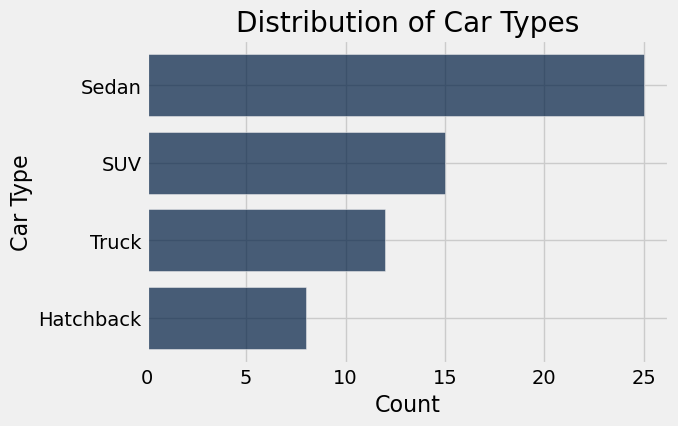

In [46]:
car_inventory.barh('Car Type', 'Count')

# Optional Customization
plt.title('Distribution of Car Types')
plt.show()

This visualization method is invaluable for quickly grasping the distribution and comparison of categorical data.

The `barh` method has a few arguments, but two important ones are the first two.

* The first argument `column_for_categories` specifies which column in the table to use for the categorical values. In this case, `column_for_categories='Car Type'`.
* The second argument `select` specifies what values to use as the length of the bars. If you don't specify this argument, then it will try to use columns with numerical data to generate the bars. In this case, `select='Count'`.

There are other arguments to experiment with, but you will typically just need to work with these two.


### Visualizing California Farmers' Market Data

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Using the `top_8_by_county` table from Task 06 above, create a bar chart showing the distribution of the number of farmers' markets for the top eight counties in California.

_Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

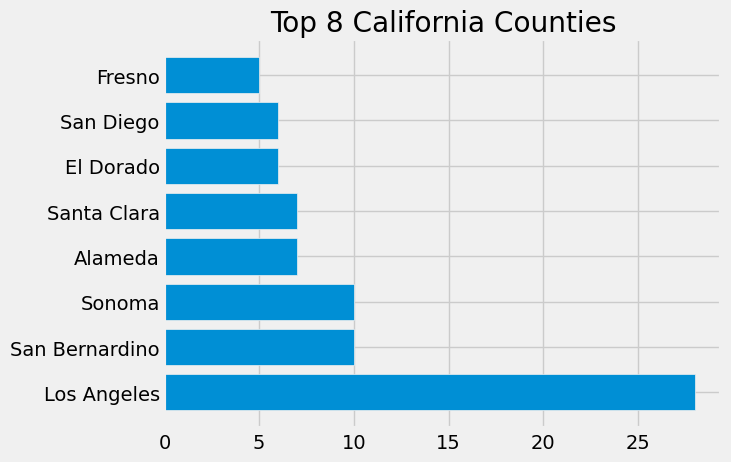

In [54]:
# Generate your chart in this cell
plt.barh(top_8_by_county.column('County'), top_8_by_county.column('count'))

plt.title('Top 8 California Counties')
plt.show()

<!-- END QUESTION -->

Great work so far! If your data is organized it is pretty easy to make a good, basic visualization. In a more realistic situation, you would be that you need to clean up your data and re-organize it to be able to make the visualization you want to make. So, this means that you will usually need to perform a few table operations first and then visualize.

### Corporate Contributions

The [OpenSecret Corporate Contributions to Outside Groups page](https://www.opensecrets.org/outside-spending/corporate-contributions) states that:

> Unlike conventional PACs (political action committees), super PACs and other outside groups can receive direct contributions from corporate treasuries.

Run the following code cell to see a list of corporations that have made direct contributions of $1,000,000 or more to an outside group. (Last Updated: November 13, 2023)

**Note**: This cell contains extra code that you are not responsible for. Extra formatting was needed to get the dates in a usable format.

In [141]:
corporate_contributions = Table.read_table('corporate_contributions.csv')

# Convert all date strings to datetime objects
from datetime import datetime
input_format = "%m/%d/%Y"
dates = corporate_contributions.column('Date')
dates = [datetime.strptime(date_string, input_format) for date_string in dates]
corporate_contributions = corporate_contributions.with_column('Date', dates)

corporate_contributions

Contributor,Recipient,Amount,Date,Recipient Viewpoint
Koch Industries,Americans for Prosperity Action,"$25,000,000",2023-05-19 00:00:00,Conservative
Ripple,Fairshake PAC,"$20,000,000",2023-12-15 00:00:00,nan
Coinbase,Fairshake PAC,"$15,500,000",2023-12-20 00:00:00,nan
Ah Capital Management,Fairshake PAC,"$14,000,000",2023-12-14 00:00:00,nan
Jump Crypto,Fairshake PAC,"$5,000,000",2023-12-13 00:00:00,nan
Ah Capital Management,Fairshake PAC,"$5,000,000",2023-10-23 00:00:00,nan
Coinbase,Fairshake PAC,"$5,000,000",2023-11-03 00:00:00,nan
Occidental Petroleum,Senate Leadership Fund,"$2,000,000",2023-06-02 00:00:00,Conservative
Farrington Rocket LLC,Best of America PAC,"$2,000,000",2023-06-30 00:00:00,Conservative
AH Capital Management,Defend American Jobs,"$1,500,000",2023-12-15 00:00:00,Conservative


### Task 08 📍

Use the `group` method with the `corporate_contributions` table to create a table called `viewpoints` with two columns in the following order: '`Recipient Viewpoint`' and `'Percentage'`. This table should show the distribution of `'Recipient Viewpoint'` values in this data set.

**Hint**: The group method gives you counts by default. Extract the count information from the grouped table, divide each count by the total number of items in the table, and multiply by 100 to get the correct percentage. You can then put the percentages back in the table using `with_column` and clean up the table using the `drop` method.

In [115]:
# Group the data by 'Recipient Viewpoint' and get counts
viewpoints_grouped = corporate_contributions.group('Recipient Viewpoint')

# Calculate the percentage for each viewpoint
percentages = viewpoints_grouped.column('count') / corporate_contributions.num_rows * 100

# Create a new table with viewpoint and percentage
viewpoints = viewpoints_grouped.with_column('Percentage', percentages)

# Drop the unnecessary columns
viewpoints = viewpoints.drop('count')

viewpoints


Recipient Viewpoint,Percentage
Conservative,66.6667
Liberal,12.1212
nan,21.2121


In [94]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ viewpoints is a Table.
task_08 - 2 message: ✅ The viewpoints table has the correct number of rows and columns.
task_08 - 3 message: ✅ The viewpoints table contains the label Recipient Viewpoint.
task_08 - 4 message: ✅ The viewpoints table contains the label Percentage.
task_08 - 5 message: ✅ It seems like the viewpoints table is correct!

### Task 09 📍🔎

<!-- BEGIN QUESTION -->

Using the `viewpoints` table, create a bar chart showing the distribution of recipient viewpoints for corporate contributions of at least $1,000,000. Make sure that the bars of your chart are organized such that the largest bars are at the top and the smallest are at the bottom.

_Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

In [148]:
# Filter the viewpoints table for corporate contributions of at least $1,000,000
viewpoints_filtered = corporate_contributions.where('Amount', are.above_or_equal_to(1000000))

# Sort the filtered table by counts in descending order
viewpoints_sorted = viewpoints_filtered.sort('Percentage', descending=True)

# Generate your chart in this cell
plt.barh(viewpoints_sorted.column('Recipient Viewpoint'), viewpoints_sorted.column('Percentage'))

plt.title('Distribution of Corporate Contribution Recipient Viewpoints')
plt.show()

TypeError: '>=' not supported between instances of 'numpy.str_' and 'int'

<!-- END QUESTION -->

One thing to keep in mind when looking at this visualization is that **some corporations made more than one contribution to the same recipient**. So, once you know how to work with the `group` method a little bit more, you might want to revisit this example and create a visualization that better shows the association between corporate contributions and recipient viewpoints.

## Histograms

When it comes to visualizing numerical data, one of the default and fundamental techniques is to use a histogram. Histograms provide a graphical representation of the distribution of numerical values within a dataset, allowing you to observe patterns, central tendencies, and variations. 

In the `datascience` library, you can create histograms conveniently using the `hist` table method. 

When working with histograms, it's essential to consider the choice of bin sizes or intervals, as this can impact the interpretation of the data. 

The `hist` method defaults to displaying data density on the vertical axis rather than raw counts. This means that the height of each bar in the histogram represents the density of data within that bin, and the area of the bar, not the count, reflects the amount of data. This distinction is crucial for accurately understanding the distribution of numerical data and is a core concept in data visualization and analysis.

Run the following code cell to create a table called `ages` contain the ages of a group of people.

In [101]:
ages = Table().with_column(
    'Age', [12, 15, 18, 20, 22, 25, 26, 28, 30, 32, 35, 36, 38, 40, 45, 50, 55]
)
ages

Age
12
15
18
20
22
25
26
28
30
32


To visualize this distribution, you can use the code `ages.hist('Age')`. `hist` has several arguments, but the first argument `columns` identifies the column(s) that contain the numerical data for the histogram.

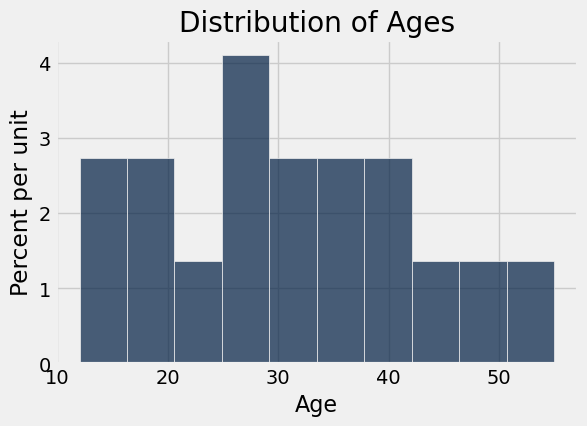

In [102]:
ages.hist('Age')

# Optional Customization
plt.title('Distribution of Ages')
plt.show()

The `hist` table method offers two other arguments that are worth mentioning for this class: `bins` and `unit`. These arguments play a pivotal role in customizing the appearance and interpretation of the histogram. 

* The `bins` argument allows you to specify the number of bins or intervals into which the data range will be divided. A well-chosen number of bins can significantly affect the visual representation of the data, influencing the granularity of the histogram. By default, there is an algorithm that attempts to generate "good" bins, but you might need to specifically define the bins with an array or the number of bins with an integer to get the histogram to look good for your situation.
* The `unit` argument provides a way to provide labels to the horizontal and vertical axes as a reminder of what the units of the data are.

The ages are most likely measured in years and it might make sense to bin these ages by creating bins that are 10 years wide. You can achieve this with the parameters `unit="Years"` and `bins=np.arange(10, 61, 10)`. 

Run the following code cell to see the results.

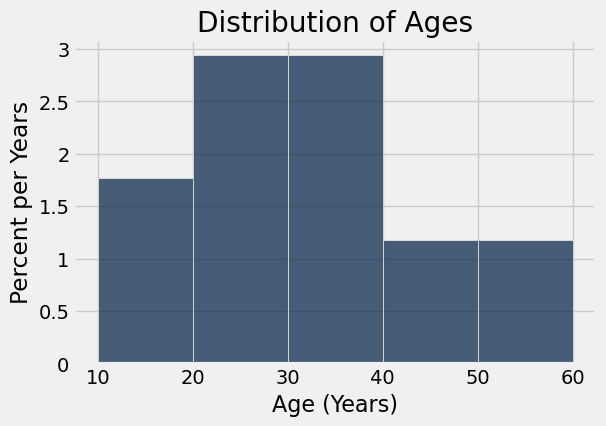

In [103]:
ages.hist('Age', unit="Years", bins=np.arange(10, 61, 10))

# Optional Customization
plt.title('Distribution of Ages')
plt.show()

Notice how the shape of the histogram changes! The same numerical data can look very different in a histogram depending on how it is binned. This can be used as a tool for analysis and inquiry, but it can also be used as a tool to misguide.

### Task 10 📍

The `'Amount'` label in the `corporate_contributions` table shows the amount that the corporation contributed. Your next task will be to visualize the distribution of contribution amounts, but there is a problem with the data. The amounts are presented as strings. Later in the course, you'll learn how to deal with this. For now, we will help you out by creating an array called `amounts` of all the dollar amounts as floats. 

Run the following cell to create that array.

In [120]:
# Just run this cell. You will learn a way to do this later in the course
amounts_as_strings = corporate_contributions.column('Amount')
amounts = np.array([float(s.replace('$', '').replace(',', '')) for s in amounts_as_strings])
amounts

array([ 25000000.,  20000000.,  15500000.,  14000000.,   5000000.,
         5000000.,   5000000.,   2000000.,   2000000.,   1500000.,
         1500000.,   1500000.,   1500000.,   1500000.,   1500000.,
         1500000.,   1500000.,   1000000.,   1000000.,   1000000.,
         1000000.,   1000000.,   1000000.,   1000000.,   1000000.,
         1000000.,   1000000.,   1000000.,   1000000.,   1000000.,
         1000000.,   1000000.,   1000000.])

Now, update the data in the `'Amount'` column in `corporate_contributions` with this array of float values.

**Hint**: If you use the `with_column` method with a column label that already exists in the table, then the information in that column will be updated with the array you use with `with_column`.

In [121]:
corporate_contributions = corporate_contributions.with_column(
    'Amount', amounts)

In [122]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ The labels of the corporate_contributions table seem correct.
task_10 - 2 message: ✅ The values in the Amount column are floats.
task_10 - 3 message: ✅ The values in the Amount column seem correct.

### Task 11 📍🔎

<!-- BEGIN QUESTION -->

Now that you have the contribution amounts as a numerical data type. Use the `hist` method on `corporate_contributions` to show the distribution of contribution amounts. The default bins do not end up creating a "good-looking" chart, try adjusting the bins to see how the bins impact the visualization.

_Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

**Note**: Ultimately, the issue with the histogram looking bad has to do with the fact that there are few really large (over 1 million dollars) contributions, and most contributions are exactly $1,000,000. A better practice might be to analyze the distribution of the contributions over 1 million dollars separately.

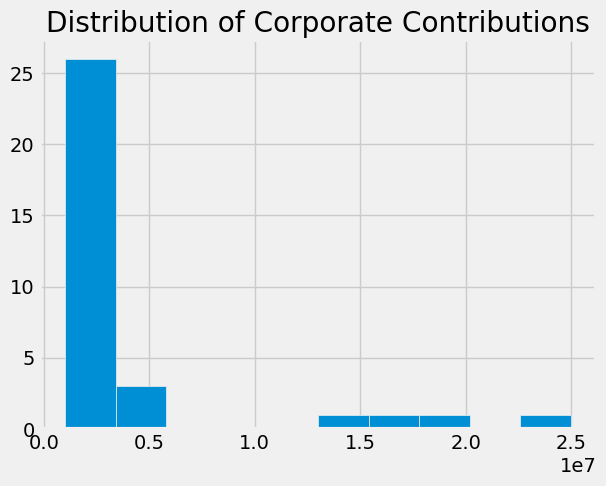

In [130]:
# Generate your chart in this cell
...
plt.hist(corporate_contributions.column('Amount'), bins=10)

plt.title('Distribution of Corporate Contributions')
plt.show()

<!-- END QUESTION -->

## Line Plots and Scatter Plots

When it comes to visualizing numerical relationships in data, scatter plots and line plots are two fundamental tools that provide valuable insights. 

In the `datascience` library, the `scatter` method is used to create scatter plots, while the `plot` method is employed to generate line plots. 

These visualization techniques share a conceptual similarity: both display data points on a two-dimensional plane, typically with one numerical variable on the x-axis and another on the y-axis. However, the key distinction lies in the purpose and interpretation.

* Scatter plots are versatile and are primarily used to showcase the association and general pattern between two numerical variables. They are excellent for revealing relationships, correlations, and outliers in the data.
* Line plots are best suited when the horizontal axis represents sequential data, such as time or distance. These plots connect the data points with lines, making them ideal for visualizing trends and showing how a numerical variable changes over a continuous range, as in the case of tracking revenue over time.

In essence, scatter plots excel at depicting associations, while line plots are tailor-made for illustrating trends and sequential relationships in numerical data.

For example, run the following code cell to generate a table called `company_data` showing revenue and profit data for the last ten years for some **fake** company.

In [131]:
# Generate random data
np.random.seed(0)
years = np.arange(2014, 2024)
revenue = np.random.poisson(14, 10) * 2_500
profit = revenue * np.random.normal(0.08, 0.002, 10)

company_data = Table().with_columns('Year', years, 'Revenue', revenue, 'Profit', profit)
company_data

Year,Revenue,Profit
2014,35000,2860.51
2015,37500,2944.34
2016,32500,2747.53
2017,32500,2505.47
2018,60000,4805.49
2019,45000,3583.15
2020,17500,1453.65
2021,32500,2695.51
2022,22500,1806.97
2023,35000,2826.47


A line plot would be a standard choice to visualize the trend of profit over time. This can be done with the command `company_data.plot('Year', 'Profit')`.

Run the following code cell to see the results.

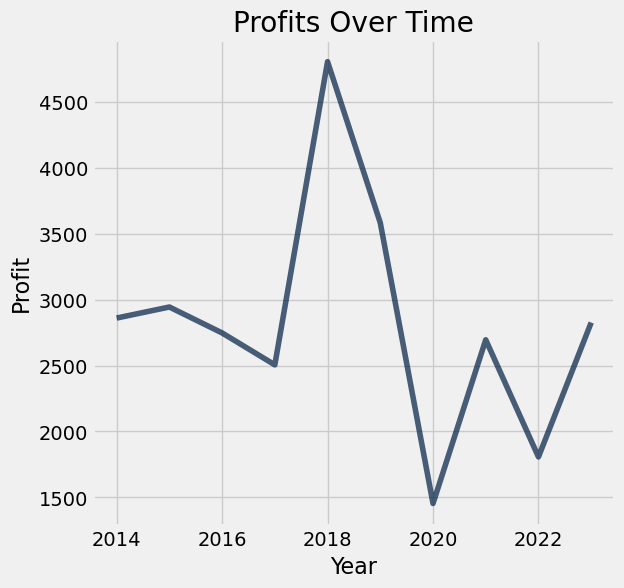

In [132]:
company_data.plot('Year', 'Profit')

# Optional Customization
plt.title('Profits Over Time')
plt.show()

The trend of this line shows that there was something very significant that happened around 2018 to make the company very profitable. After a short period of time of high profits, there was a steep decline in profit levels that were lower than in years previous to 2018. For the last few years, the company's profits seem to lack stability. This is likely due to economic instability surrounding the pandemic, but all this profit data was made up and so is money. 🤓

It might be nice to compare the trends of two numerical distributions over the same horizontal axis. This would be a great time to try an overlaid line plot. For example, you could plot the lines for both profit and revenue over time.

The `plot` method can handle this by making sure the table only contains the variables you are interested in `'Year'`, `'Profit'`, and `'Revenue'` and just specifying the horizontal axis in the `plot` method. For example, just use `company_data.plot('Year')`.

Run the following cell to see that a line is created for every numerical column in the table other than `'Year'`.

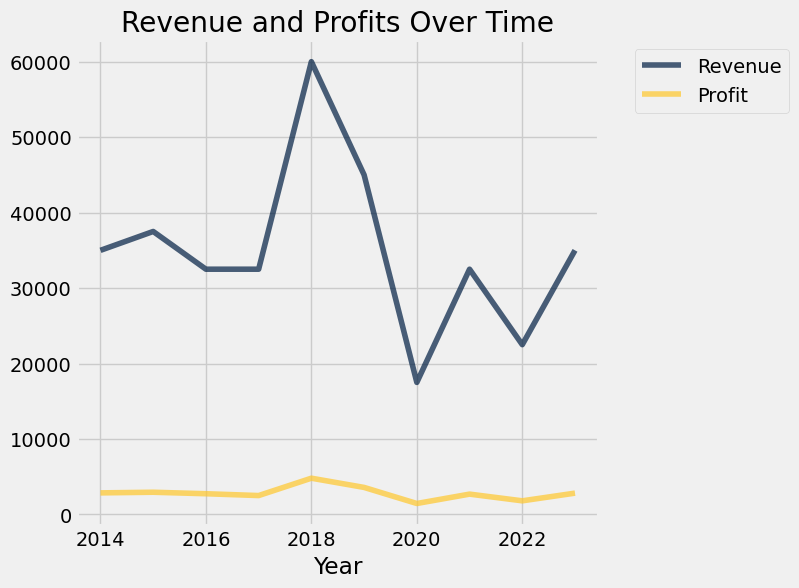

In [133]:
company_data.plot('Year')

# Optional Customization
plt.title('Revenue and Profits Over Time')
plt.show()

Revenue looks much less stable on this graph because of the scale of the values. Profits were hovering around 8% of revenue, so putting both lines on the y-axis doesn't offer a fair comparison.

How do you better see the relationship between revenue and profit? Since the data are not sequential and you are just looking to visualize the association, use a scatter plot. The `scatter` method would help out with this. Since profit follows from revenue, it is standard practice to have the horizontal axis reflect revenue values. Use the command `company_data.scatter('Revenue', 'Profit')` to make this happen.

Run the following cell to see the results.

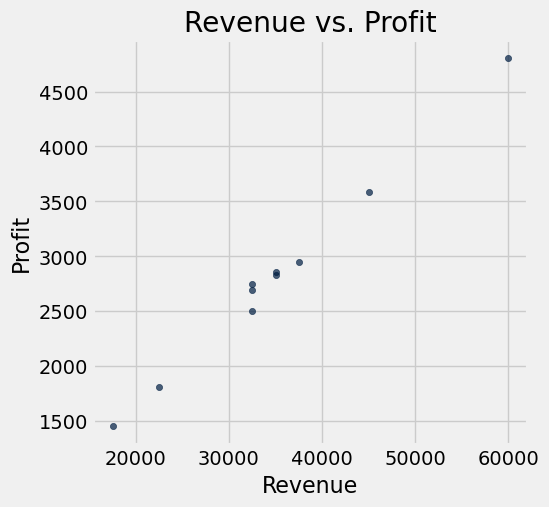

In [134]:
company_data.scatter('Revenue', 'Profit')

# Optional Customization
plt.title('Revenue vs. Profit')
plt.show()

This shows a pretty strong (linear) positive relationship between revenue and profit. Dividing the profit values by the revenue shows a pretty stable profit margin of roughly 8%.

In [135]:
profit_margins = company_data.column('Profit') / company_data.column('Revenue')
print('The profit margins (profile/revenue) are:\n')
display(profit_margins)
average_profit_margin = "{:.2%}".format(np.average(profit_margins))
print(f'\nThe average profit margin over this period is {average_profit_margin}')

The profit margins (profile/revenue) are:



array([ 0.08172887,  0.07851567,  0.08453951,  0.07709127,  0.08009152,
        0.07962563,  0.08306556,  0.08293872,  0.08030989,  0.08075633])


The average profit margin over this period is 8.09%


### Task 12 📍🔎

<!-- BEGIN QUESTION -->

For this task, return to the corporate contribution data in `corporate_contributions`, and create a line plot using the `plot` table method to visualize the trend of corporate contributions over the election cycle.

_Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

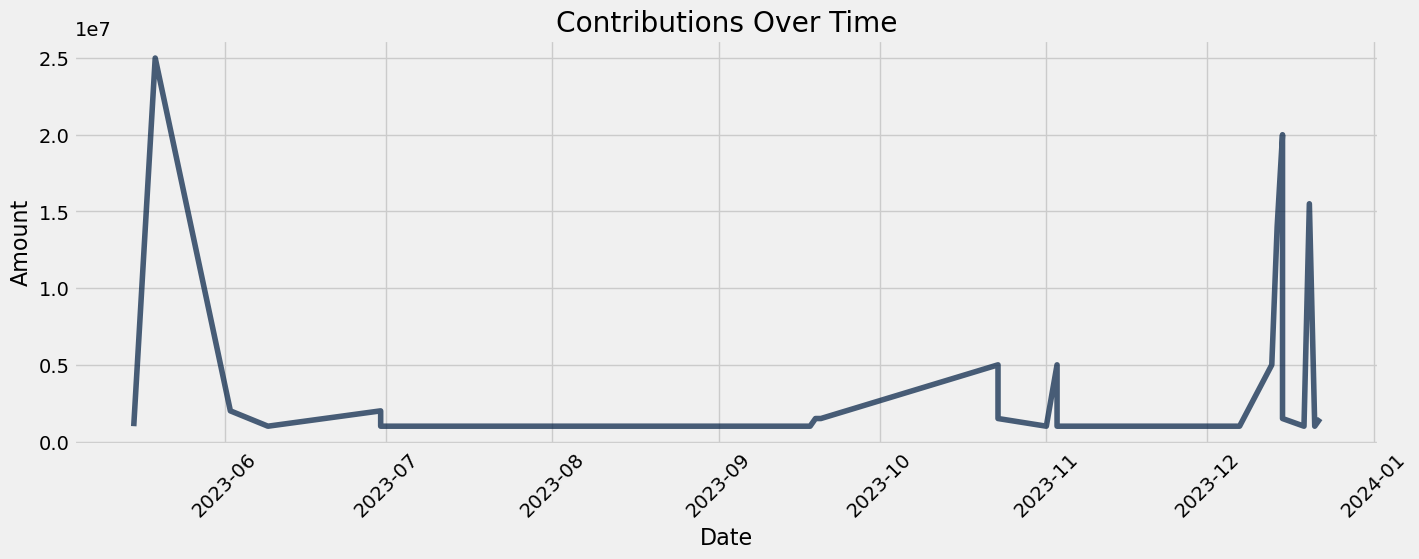

In [136]:
# Generate your chart in this cell
corporate_contributions.plot('Date', 'Amount')

# Customization
plt.title('Contributions Over Time')
plt.gcf().set_size_inches(15, 5)
plt.xticks(rotation=45)
plt.show()

<!-- END QUESTION -->

### Task 13 📍🔎

<!-- BEGIN QUESTION -->

What do you notice about the line graph in terms of contribution trends in relation to the election cycle?

_Make sure to check your response with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

More information is needed. The time period is very limited.

<!-- END QUESTION -->

### Outside Spending

According to the [OpenSecrets Outside Spending page](https://www.opensecrets.org/outside-spending/summary):

> A January 2010 Supreme Court decision (Citizens United v. Federal Election Commission) permits corporations and unions to make political expenditures from their treasuries directly and through other organizations, as long as the spending -- often in the form of TV ads -- is done independently of any candidate. In many cases, the activity takes place without complete or immediate disclosure about who is funding it, preventing voters from understanding who is truly behind many political messages. The spending figures cited are what the groups reported to the FEC; it does not account for all the money the groups spent, since certain kinds of ads are not required to be reported.

Run the following cell to create the table `outside_spending` showing the outside spending for all the senate races in the 2022 election cycle.

**Note**: The focus of the 2024 election cycle is on the presidential election, so similar data for this year doesn't show as much spending on advertising for and against each party. We've included the 2024 election cycle data in the file `outside_spending_2024.csv` if you want to explore it to see how the spending is much different.

In [137]:
outside_spending = Table.read_table('outside_spending_2022.csv')
outside_spending.show()

Race,For Dems,Against Dems,For Repubs,Against Repubs
Pennsylvania Senate,39570169,81322826,23957259,98219173
Georgia Senate,42730486,63251936,44095363,74837797
Wisconsin Senate,13098167,50040668,24146293,33780246
Nevada Senate,20315783,47703937,7994024,37128626
Arizona Senate,22412869,30491416,21034906,33829849
North Carolina Senate,6281440,42285557,25368517,23780490
Ohio Senate,3948237,35271534,25812585,30631478
New Hampshire Senate,3992855,10641693,17520560,17843300
Alabama Senate,0,0,16613271,14998353
Colorado Senate,2186362,6179689,3164739,20011828


### Task 14 📍🔎

<!-- BEGIN QUESTION -->

Create a few scatter plots using the `outside_spending` data. Stop when you find a visualization that shows a positive association.

**Suggestion**: Try to find the positive association between two different attributes that seems the strongest!

_Make sure to check your visualization with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this lab task._

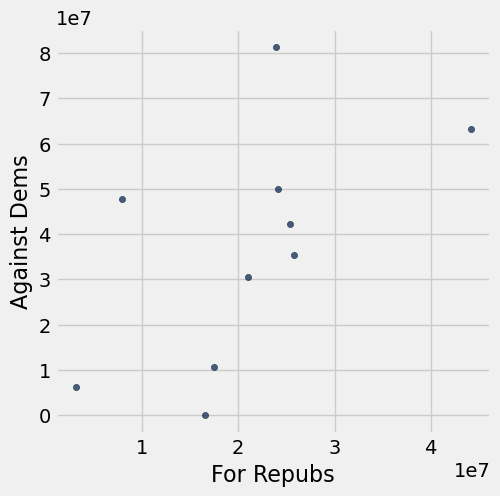

In [138]:
# Generate your chart in this cell
outside_spending.scatter('For Repubs', 'Against Dems')

<!-- END QUESTION -->

Great work! You now have some practice with the basics of data visualization.

## Summary

For your reference, here's a table of all the functions and methods we saw in this lab. As your list of operations expands, you'll find it help to consult with the [datascience documentation](https://datascience.readthedocs.io/) or the quick reference in Canvas rather than trying to memorize all the commands.

|Name|Example|Purpose|
|-|-|-|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select(col1,col2,...)`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop(col1,col2,...)`|Create a copy of a table without some of the columns|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`group`|`tbl.group(col)`|Create a table with the distinct values from `col` and the counts of those values|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`take`|`tbl.take(row_indices)`|Create a copy of a table with only some of the rows|
|`barh`|`tbl.barh(col)`|Create a horizontal bar chart for the values in the column|
|`hist`|`tbl.hist(col)`|Create a histogram for the values in the column|
|`plot`|`tbl.plot(col_x, col_y)`|Create a line plot using the columns|
|`scatter`|`tbl.scatter(col_x, col_y)`|Create a scatter plot using the columns|

## Submit your Lab to Canvas

Once you have finished working on the lab questions, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the requirements for a Complete score for this lab assignments.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
4. Select the menu items "File", "Save and Export Notebook As...", and "HTML (.html)" in the notebook's Toolbar to download an HTML version of this notebook file.
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded HTML file.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [139]:
grader.check_all()

task_02 results: All test cases passed!
task_02 - 1 message: ✅ Great work!

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Great work. It seems you have the correct columns!
task_03 - 2 message: ✅ Your table seems to have the correct information.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ It seems you have the correct number of markets.
task_04 - 2 message: ✅ You've filtered the table to just San Francisco markets.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ You've made a table with the correct name.
task_05 - 2 message: ✅ It seems like you have the correct number of columns!
task_05 - 3 message: ✅ It seems like you have the values sorted correctly!

task_06 results: All test cases passed!
task_06 - 1 message: ✅ categorical_attributes is an array.
task_06 - 2 message: ✅ categorical_attributes contains numbers 1 - 10.
task_06 - 3 message: ✅ Great work on identifying all of the categorical attributes!

task_08 results: All test cas